In [1]:
import sys
import os
from os.path import join, exists, abspath
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm, colors
import scipy
from scipy.stats import ttest_1samp, pearsonr
from scipy.spatial.distance import squareform
import h5py
import seaborn as sns

from tqdm import tqdm

In [2]:
import warnings

In [3]:
import nibabel as nb
from nilearn import plotting
from nipype.interfaces import fsl

In [4]:
dir_current = os.getcwd().replace('\\','/')
dir_current

'D:/mobaxterm/sungbeenpark/github/diedrichsenlab/atlas'

In [5]:
tmp = dir_current.split('/')
idx = [idx for idx, ss in enumerate(tmp) if ss=='github' ][0]
dir_git = '/'.join(tmp[:idx+1])
exists(dir_git)

True

In [6]:
path_module = abspath(join(dir_git,'nitools'))
if exists(path_module):
    print('added the path, %s'%path_module)
    if path_module not in sys.path:
        sys.path.append(path_module)

import nitools as nt

added the path, D:\mobaxterm\sungbeenpark\github\nitools


In [7]:
path_module = abspath(join(dir_git,'SUITPy'))
if exists(path_module):
    print('added the path, %s'%path_module)
    if path_module not in sys.path:
        sys.path.append(path_module)

import SUITPy as suit

added the path, D:\mobaxterm\sungbeenpark\github\SUITPy


In [8]:
path_module = abspath(dir_git)
if exists(path_module):
    print('added the path, %s'%path_module)
    if path_module not in sys.path:
        sys.path.append(path_module)

import surfAnalysisPy as surf

added the path, D:\mobaxterm\sungbeenpark\github


In [9]:
path_module = abspath(join(dir_git,'PcmPy'))
if exists(path_module):
    print('added the path, %s'%path_module)
    if path_module not in sys.path:
        sys.path.append(path_module)

import PcmPy as pcm

added the path, D:\mobaxterm\sungbeenpark\github\PcmPy


---

In [10]:
dir_work = dir_current
dir_atlas = join(dir_work,'fs_LR_32k')
dir_atlas

'D:/mobaxterm/sungbeenpark/github/diedrichsenlab/atlas\\fs_LR_32k'

---

### ROIs

In [11]:
underlay = join(dir_atlas,'fs_LR.32k.LR.sulc.dscalar.gii')

In [12]:
fname = join(dir_atlas,'ROI.L.SSS.label.gii')
list_roi = ['SMA', 'PMv', 'PMd', 'M1', 'S1', 'SPLa', 'SPLp', 'DSVC', 'MT+', 'VSVC', 'EAC']

In [13]:
img = nb.load(fname)
cols = nt.get_gifti_column_names(img)
print('column heads (%d):\n'%len(cols),cols)

data = img.darrays[0].data
print(np.unique(data), data.shape)

column heads (1):
 ['col_1']
[ 0  1  2  3  4  5  6  7  8  9 10 11] (32492,)


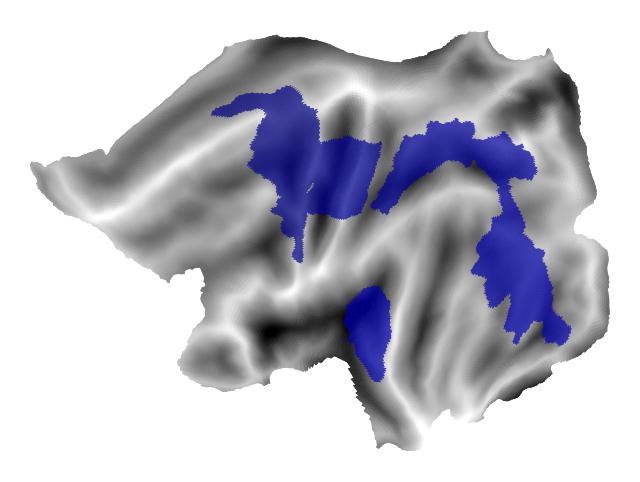

In [14]:
fig = plt.figure(figsize=(8,6))
ax = surf.plot.plotmap(
    data=data*(data!=0),
    surf='fs32k_L',
    underlay=underlay, alpha=0.7, cmap=cm.jet,
    # borders=join(dir_atlas,'fs_LR.32k.L.border-IPS.border'), bordercolor='white', bordersize=3,
    overlay_type='func', label_names=list_roi, render='matplotlib'
)

---

In [17]:
dir_work = 'F:/SeqSpatialSupp_fMRI/ROI'

In [23]:
list_roi = ['SMA', 'PMv', 'PMd', 'M1', 'S1', 'SPLa', 'SPLp', 'DSVC', 'MT+', 'VSVC', 'EAC']

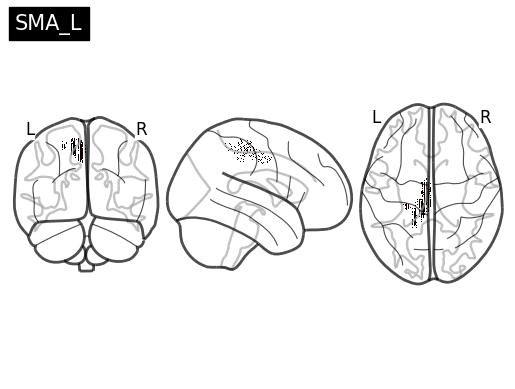

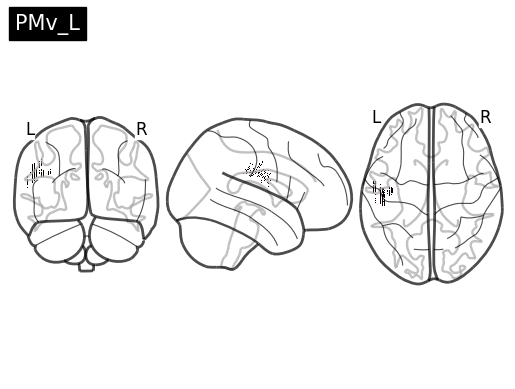

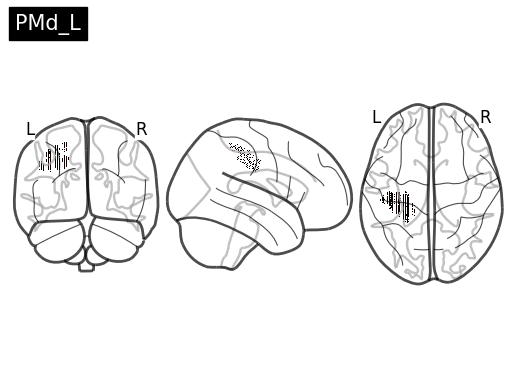

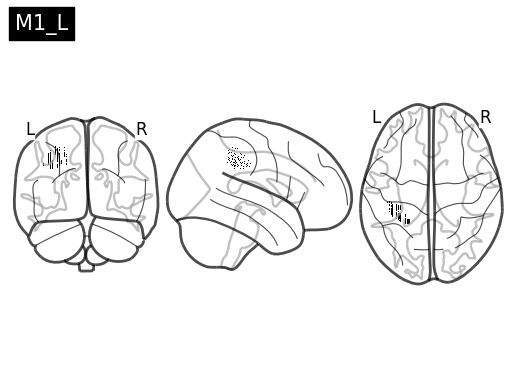

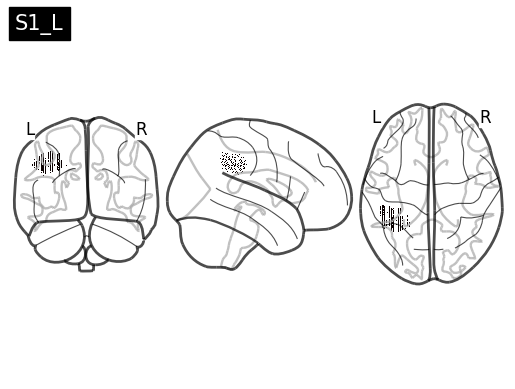

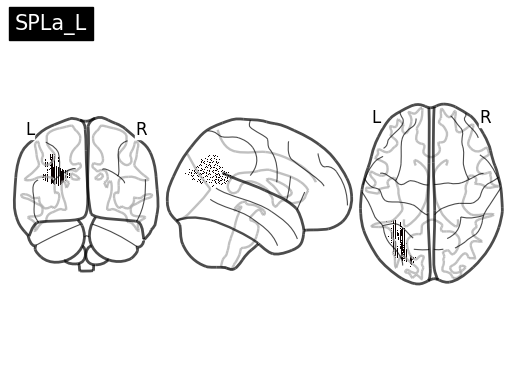

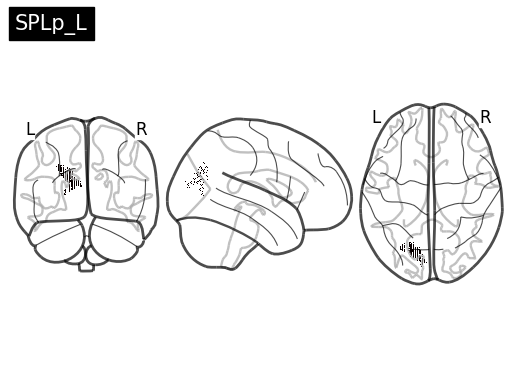

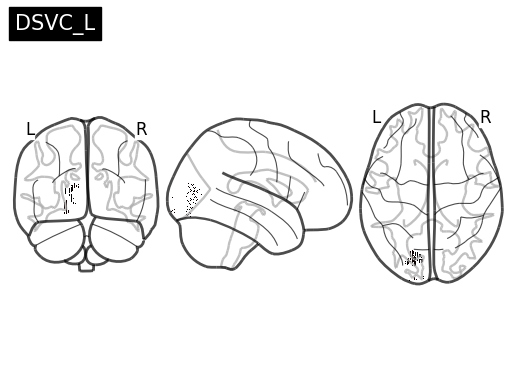

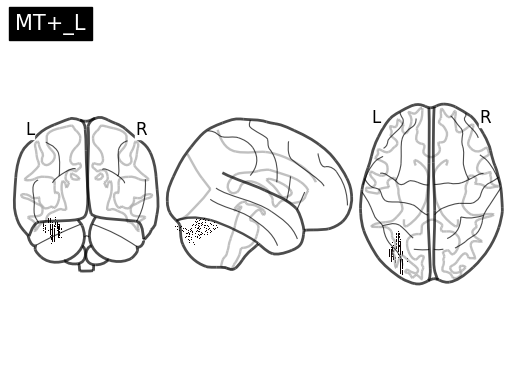

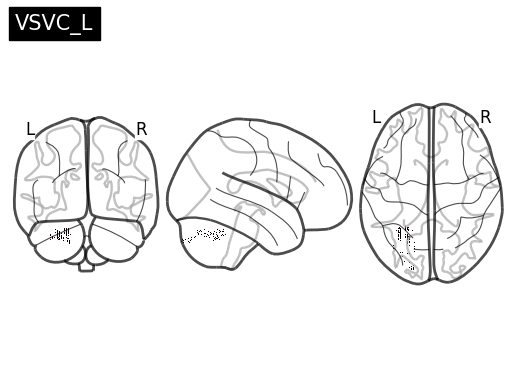

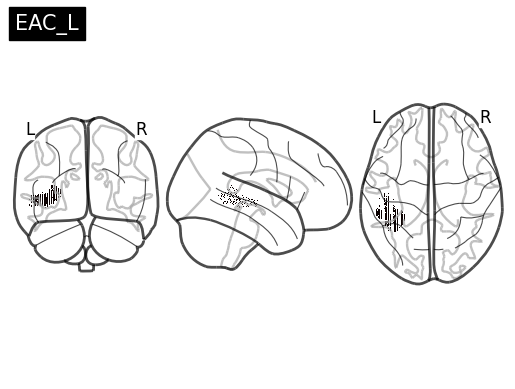

In [31]:
subj = 'S01'
for i, roi in enumerate(list_roi):
    fig, ax = plt.subplots()
    fname = join(dir_work,'%s_%s_L.nii'%(subj,roi))
    # img = nb.load(fname)
    plotting.plot_glass_brain(fname, annotate=True, title='%s_L'%roi, axes=ax)